**File reading**
***

In [33]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('docs/simpsons_dataset.csv').dropna()

# imprima las primeras 5 filas
df.head()

#Cambiamos las etiquetas texutales por etiquetas numericas, esto es una buena practica cuando se construyen modelo supervisados
# df['label'] = df.label.map({'ham':0, 'spam':1})
print(df.shape)
df.head(20) # returns (rows, columns)

(131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
10,Landlady,"Hey, hey, he Moved out this morning. He must h..."


## Text Pre Processing for embeddings

In [34]:
import gzip
import gensim
import logging

### BOW

In [35]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess(line)

In [36]:
from gensim.utils import simple_preprocess

def preproccess(line):
    return simple_preprocess(line)



df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Miss Hoover,"No, actually, it was a little of both. Sometim...","[no, actually, it, was, little, of, both, some..."
1,Lisa Simpson,Where's Mr. Bergstrom?,"[where, mr, bergstrom]"
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,"[don, know, although, sure, like, to, talk, to..."
3,Lisa Simpson,That life is worth living.,"[that, life, is, worth, living]"
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,"[the, polls, will, be, open, from, now, until,..."
5,Martin Prince,I don't think there's anything left to say.,"[don, think, there, anything, left, to, say]"
6,Edna Krabappel-Flanders,Bart?,[bart]
7,Bart Simpson,Victory party under the slide!,"[victory, party, under, the, slide]"
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,"[mr, bergstrom, mr, bergstrom]"
10,Landlady,"Hey, hey, he Moved out this morning. He must h...","[hey, hey, he, moved, out, this, morning, he, ..."


In [37]:
documents = df['proccesed'].to_numpy()

In [38]:
model_skipgram = gensim.models.Word2Vec(documents, vector_size=150, window=10, min_count=2, workers=10, sg=1)
model_skipgram.train(documents,total_examples=len(documents),epochs=10)

(9561546, 12451860)

In [39]:
model_skipgram.save("word2vec150.model")

In [40]:
print(model_skipgram.wv['morning'])

[-0.12127326 -0.02946819  0.23576275 -0.22420229 -0.34059992  0.25540534
 -0.02662714 -0.14076047 -0.19666977 -0.26050067 -0.10760308  0.30230942
 -0.23148064  0.34598732  0.12901488 -0.4710018   0.20203456 -0.21870321
  0.19899413  0.26543087 -0.17629896 -0.21605375  0.35489288  0.2707032
 -0.22147487 -0.1141358  -0.48983678  0.2562714   0.00810088  0.319309
 -0.14545117 -0.400716    0.40580738  0.29695725 -0.36041805 -0.37198675
  0.42193666  0.01062655 -0.5224144  -0.17231077 -0.18080546  0.48128462
 -0.4611927  -0.08329382 -0.00650425 -0.05269419 -0.22929105  0.11969212
  0.24044037  0.35876852  0.14669628 -0.18947652 -0.02341918  0.32173476
 -0.0523327  -0.31943312  0.32710895  0.21304576  0.24073362  0.14801086
 -0.55747443 -0.35657302 -0.19263832 -0.5094855  -0.22249807 -0.15303582
  0.0211812  -0.57535     0.17070521 -0.57914746 -0.11172843  0.5390052
 -0.24222998 -0.09436794  0.38844138  0.15378039 -0.0480825  -0.5089815
 -0.4171602   0.11199514  0.60332286 -0.27442905 -0.1673

In [41]:
model_100 = gensim.models.Word2Vec (documents, vector_size=100, window=10, min_count=2, workers=10, sg=1)
model_100.train(documents,total_examples=len(documents),epochs=10)

(9560603, 12451860)

In [42]:
model_100.save("word2vec100.model")

In [43]:
print(model_100.wv['morning'])

[ 0.4065309   0.24774887 -0.03529518 -0.5950817   0.5815947  -0.47413948
 -0.2067619   0.11408081 -0.25147936 -0.09952641 -0.81567264 -0.2488609
  0.41187987  0.22075236  0.06551155 -0.17807244  0.03814209 -0.39417198
 -0.3642724  -0.68400085 -0.09912026  0.03595356  1.1152735  -0.11791491
  0.19087051 -0.02269981  0.00051659  0.3656201   0.36676174 -0.2692575
 -0.18590754  0.07420958  0.15724799  0.5138618  -0.3854656   0.6076584
  0.42899272  0.39467964 -0.04029037 -0.00894807 -0.08815429 -0.0063122
 -0.35924718 -0.18652175  0.08723614 -0.05558612 -0.06292689 -0.1229899
  0.3838295   0.04761248  0.3636583   0.3283656   0.4338925  -0.39652678
 -0.22923575  0.09026944 -0.23695458 -0.15411855 -0.29035646 -0.40233642
  0.08252084  0.4046034  -0.5046503   0.36957902 -0.4563511   0.31738642
  0.19317667  0.63297075  0.19800645  0.35675573 -0.42890617  0.63389117
  0.551032    0.03252137 -0.07942299 -0.05504309  0.17846029  0.15816288
  0.34673426 -0.08441857  0.12394875 -0.48254463 -0.1868

In [44]:
model_50 = gensim.models.Word2Vec(documents, vector_size=50, window=10, min_count=2, workers=10, sg=1)
model_50.train(documents,total_examples=len(documents),epochs=10)

(9562089, 12451860)

In [45]:
model_50.save("word2vec50.model")


In [46]:
df.shape

(131853, 3)

## Read


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [48]:

model50 = gensim.models.Word2Vec.load("word2vec50.model")
model100 = gensim.models.Word2Vec.load("word2vec100.model")
model150 = gensim.models.Word2Vec.load("word2vec150.model")

In [49]:
model50.wv.similar_by_word('homer')

[('marge', 0.8597880601882935),
 ('simpson', 0.7998246550559998),
 ('bart', 0.7936820983886719),
 ('fonzie', 0.7819506525993347),
 ('wildcats', 0.7725690007209778),
 ('abe', 0.7534539699554443),
 ('bartholomew', 0.7517833113670349),
 ('you', 0.7422791719436646),
 ('imbecile', 0.7306463718414307),
 ('ead', 0.7284229397773743)]

In [50]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig(f'./{word}_{n}.jpg')
    plt.show()

## Graphs and analysis
***

**Vector dimension:** 50

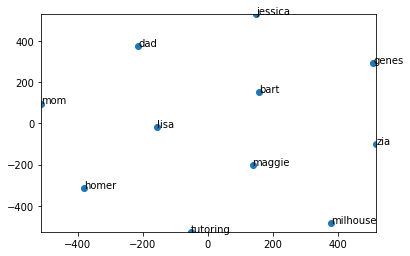

In [51]:
display_closestwords_tsnescatterplot(model50, 'bart', 50)

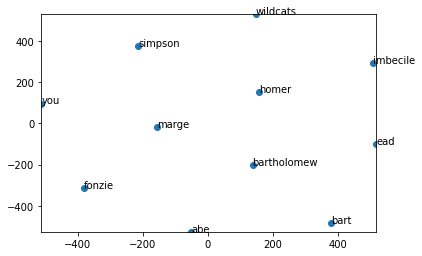

In [52]:
display_closestwords_tsnescatterplot(model50, 'homer', 50)

**Vector dimension:** 100

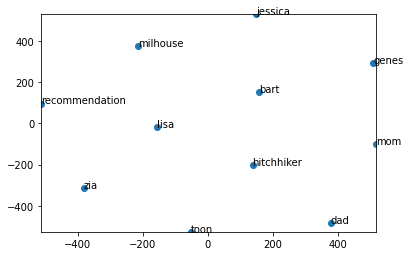

In [53]:
display_closestwords_tsnescatterplot(model100, 'bart', 100)

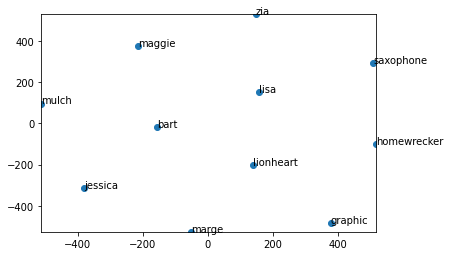

In [54]:
display_closestwords_tsnescatterplot(model100, 'lisa', 100)

**Vector size:** 150

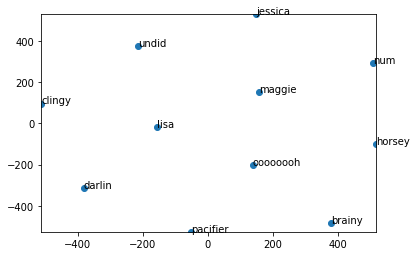

In [55]:
display_closestwords_tsnescatterplot(model150, 'maggie', 150)

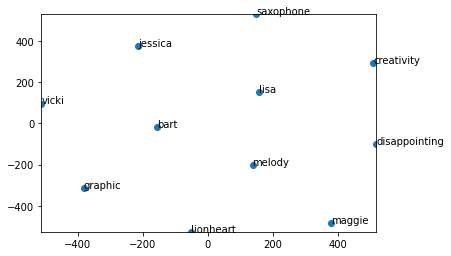

In [56]:
display_closestwords_tsnescatterplot(model150, 'lisa', 150)

# Redes neuronales


In [57]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from sklearn.model_selection import train_test_split

In [58]:
from sklearn.preprocessing import OneHotEncoder


## Preparacion de los datos

In [59]:

# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df_0 = pd.read_csv('docs/simpsons_dataset.csv').dropna()

target_simpsons = [
    'Lisa Simpson', 
    'Bart Simpson',
    'Homer Simpson',
    'Marge Simpson',
    'Maggie Simpson',
    'Grampa Simpson'
]
df = df_0.loc[df_0['raw_character_text'].isin(target_simpsons)]

In [60]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['raw_character_text']])
print(enc.categories_)

[array(['Bart Simpson', 'Grampa Simpson', 'Homer Simpson', 'Lisa Simpson',
       'Maggie Simpson', 'Marge Simpson'], dtype=object)]


In [61]:
vectorize_layer = TextVectorization(
    ngrams=None, 
    max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True, 
)

In [65]:
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values

y = enc.transform(df[['raw_character_text']]).toarray()
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)

# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train,y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test,y_test))

# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))

In [66]:
# Now that the vocab layer has been created, call `adapt` on the text-only
# dataset to create the vocabulary
vectorize_layer.adapt(text_dataset.batch(64))

## Prueba 1

In [67]:
##LAYERS

# Start by creating an explicit input layer. It needs to have a shape of  
# (1,) (because we need to guarantee that there is exactly one doc
text_input = tf.keras.Input(shape=(1,), dtype=tf.string, name='text') 

# The first layer in our model is the vectorization layer. After this layer,
# we have a tensor of shape (batch_size, max_len) containing vocab indices.

x = vectorize_layer(text_input) 
primera_capa = layers.Dense(10, activation='relu')(x)

# We project onto a single unit output layer, and squash it with a sigmoid:
predictions = layers.Dense( len(target_simpsons), activation='softmax', name='predictions')(primera_capa) 
model = tf.keras.Model(text_input, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
# https://keras.io/api/losses/
# https://keras.io/api/optimizers/
# Ojo con las metricas ya que el entrenamiento es en batches
# https://keras.io/api/models/model_training_apis/
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [68]:
# list(enc.get_feature_names())
len(vectorize_layer.get_vocabulary())

20742

In [69]:
batch_size = 32
epochs = 20

# Fit the model using the train and test datasets.
model.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/20
1249/1249 [==============================] - 9s 6ms/step - loss: 0.4712 - accuracy: 0.4109 - val_loss: 0.3461 - val_accuracy: 0.4842

In [70]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text (InputLayer)            [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 20742)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                207430    
_________________________________________________________________
predictions (Dense)          (None, 6)                 66        
Total params: 207,496
Trainable params: 207,496
Non-trainable params: 0
_________________________________________________________________


## 4.1 Red Feedforward

In [77]:
from keras.models import Sequential

In [78]:
#Parameters

batch_size = 32
epochs = 10

### Output mode: binary

In [79]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size))

In [80]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20742

In [81]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [82]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [83]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/10
1249/1249 [==============================] - 53s 41ms/step - loss: 1.5482 - accuracy: 0.3985 - val_loss: 1.4049 - val_accuracy: 0.4155

In [84]:
modelemb.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, 20742)             0         
_________________________________________________________________
embedding (Embedding)        (None, 20742, 5)          103710    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 5)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 66        
Total params: 103,836
Trainable params: 103,836
Non-trainable params: 0
_________________________________________________________________


### Output mode: int

In [85]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='int', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size))

In [86]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20743

In [87]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [88]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [89]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/10
1249/1249 [==============================] - 5s 3ms/step - loss: 1.5298 - accuracy: 0.4088 - val_loss: 1.3991 - val_accuracy: 0.4155

In [90]:
modelemb.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_2 (TextVe (None, None)              0         
_________________________________________________________________
embedding (Embedding)        (None, None, 5)           103715    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 66        
Total params: 103,841
Trainable params: 103,841
Non-trainable params: 0
_________________________________________________________________


### Output mode: tf-idf

In [91]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='tf-idf', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size))

In [92]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20742

In [93]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.GlobalAveragePooling1D(),
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])

In [94]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [95]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/10
1249/1249 [==============================] - 62s 49ms/step - loss: 1.5201 - accuracy: 0.4017 - val_loss: 1.4054 - val_accuracy: 0.4155

In [97]:
modelemb.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_3 (TextVe (None, 20742)             0         
_________________________________________________________________
embedding (Embedding)        (None, 20742, 5)          103710    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 66        
Total params: 103,836
Trainable params: 103,836
Non-trainable params: 0
_________________________________________________________________


## 4.2 RNN

In [98]:
from keras.layers.recurrent import LSTM, GRU, SimpleRNN

### Output mode: binary

In [99]:
vectorize_layer = TextVectorization(
    ngrams=None,
    max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True,
)

vectorize_layer.adapt(text_dataset.batch(batch_size))

In [100]:
vocab_size = len(vectorize_layer.get_vocabulary())
vocab_size

20742

In [101]:
embedding_dim = 5

modelemb = Sequential([
  vectorize_layer,
  layers.Embedding(vocab_size, embedding_dim, name="embedding"),
  layers.SimpleRNN(embedding_dim),
    #layers.Dropout(0.5)
  layers.Dense(10, activation='relu'),
  layers.Dense(len(target_simpsons), activation='softmax')
])



In [102]:
modelemb.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [103]:
modelemb.fit(
    train_dataset.batch(batch_size),
    validation_data=test_dataset.batch(batch_size),
    epochs=epochs)

Epoch 1/10
  22/1249 [..............................] - ETA: 20:57:54 - loss: 1.7416 - accuracy: 0.4020

KeyboardInterrupt: 

In [ ]:
modelemb.summary()